## problem defination
>> we have a dataset contains 13,165 images for smile people and non smile people and we want to build a classifier that can classify a new image to know if this person is smile or not

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [2]:
def smile_detection_model():
    DESIRED_ACCURACY = 0.999

    # call back to stop when accuracy reaches 99%
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>DESIRED_ACCURACY):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
    
    # building model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    
    #compile model
    model.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])
    
        
    model.summary()
    
    
    train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)


    train_generator = train_datagen.flow_from_directory(
        'E:\\assignments_DRkhaled\\smile_detection\\Smile Detection',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64*64
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')
 
    validation_datagen = train_datagen.flow_from_directory(
     'E:\\assignments_DRkhaled\\smile_detection\\Smile Detection', # same directory as training data
    target_size=(64, 64),
    batch_size=10,
    class_mode='binary',
    subset='validation') # set as validation data
    
         
    # model fitting
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=10532/10 ,  
      epochs=15,
      verbose=1, callbacks=[callbacks],
     validation_data=validation_datagen,
     validation_steps=2633/10)
    

    return history

In [3]:
history=smile_detection_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d

## total training time is about 1200 second time increased after epoch 8 because i was runing other 2 notebooks at the same time

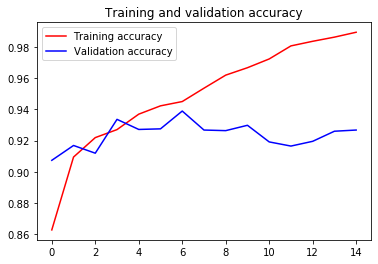

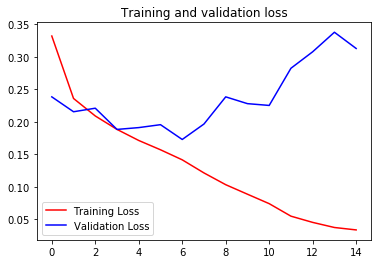

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# add dropout and see the result because there is an over fitting

In [5]:
def smile_detection_model_droupout():
    DESIRED_ACCURACY = 0.999
    
    # call back to stop when accuracy reaches 99%
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>DESIRED_ACCURACY):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
    
    # building model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),     
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])



    model.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])
    
    model.summary()
        


    train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)


    train_generator = train_datagen.flow_from_directory(
        'E:\\assignments_DRkhaled\\smile_detection\\Smile Detection',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64*64
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')
 
    validation_datagen = train_datagen.flow_from_directory(
     'E:\\assignments_DRkhaled\\smile_detection\\Smile Detection', # same directory as training data
    target_size=(64, 64),
    batch_size=10,
    class_mode='binary',
    subset='validation') # set as validation data
    
         
    # model fitting
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=10532/10 ,  
      epochs=15,
      verbose=1, callbacks=[callbacks],
     validation_data=validation_datagen,
     validation_steps=2633/10)
    

    
    return history

In [6]:
history2=smile_detection_model_droupout()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

# total training time is about 1,125 second

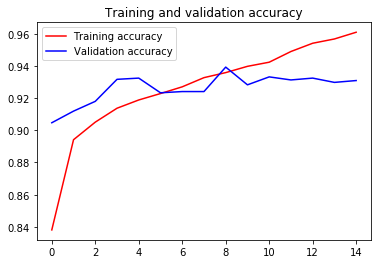

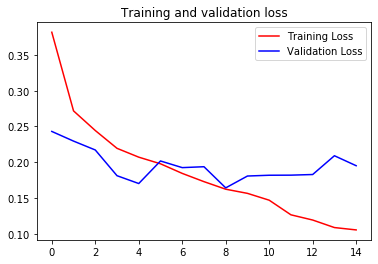

In [7]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# lets make an early stopping 

In [6]:
def smile_detection_model_early_stopping():


    #early stopping based on validation loss
    early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
    #This callback will stop the training when there is no improvement in
    # the validation loss for three consecutive epochs.

    #CSVLogger logs epoch, acc, loss, val_acc, val_loss
    log_csv = CSVLogger('my_logs.csv', separator=',', append=False)
    callbacks_list = [ early_stop, log_csv]
    
    
    # bulding model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),     
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])



    model.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])
    
    model.summary()
        


    train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)


    train_generator = train_datagen.flow_from_directory(
        'E:\\assignments_DRkhaled\\smile_detection\\Smile Detection',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64*64
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')
 
    validation_datagen = train_datagen.flow_from_directory(
     'E:\\assignments_DRkhaled\\smile_detection\\Smile Detection', # same directory as training data
    target_size=(64, 64),
    batch_size=10,
    class_mode='binary',
    subset='validation') # set as validation data
    
         
    # model fitting
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=10532/10 ,  
      epochs=15,
      verbose=1, 
     callbacks=callbacks_list,
     validation_data=validation_datagen,
     validation_steps=2633/10)
    

    
    return history

In [7]:
history3=smile_detection_model_early_stopping()

Found 10532 images belonging to 2 classes.
Found 2633 images belonging to 2 classes.
Epoch 1/15
1054/1053 [==============================] - 516s 489ms/step - loss: 0.3788 - acc: 0.8374 - val_loss: 0.2593 - val_acc: 0.8883
Epoch 2/15
1054/1053 [==============================] - 75s 71ms/step - loss: 0.2793 - acc: 0.8899 - val_loss: 0.2189 - val_acc: 0.9134
Epoch 3/15
1054/1053 [==============================] - 76s 72ms/step - loss: 0.2513 - acc: 0.8953 - val_loss: 0.2050 - val_acc: 0.9252
Epoch 4/15
1054/1053 [==============================] - 78s 74ms/step - loss: 0.2318 - acc: 0.9067 - val_loss: 0.2243 - val_acc: 0.9073
Epoch 5/15
1054/1053 [==============================] - 76s 72ms/step - loss: 0.2151 - acc: 0.9169 - val_loss: 0.1910 - val_acc: 0.9267
Epoch 6/15
1054/1053 [==============================] - 71s 67ms/step - loss: 0.2014 - acc: 0.9202 - val_loss: 0.1879 - val_acc: 0.9286
Epoch 7/15
1054/1053 [==============================] - 78s 74ms/step - loss: 0.1910 - acc: 0.922

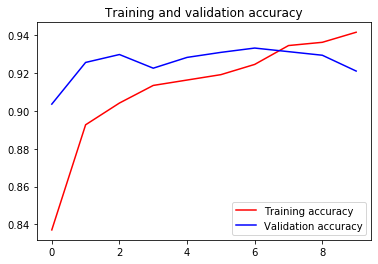

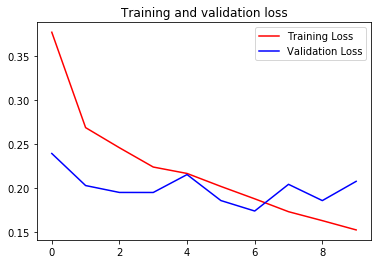

In [10]:
import matplotlib.pyplot as plt
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Try Transfer learning

In [6]:
import wget
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
myfile = wget.download(url)

100% [........................................................................] 87910968 / 87910968

In [11]:
def smile_detection_model_Transfer_learning():
    
    local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

    pre_trained_model = InceptionV3(input_shape = (75, 75, 3), 
                                    include_top = False, 
                                    weights = None)

    pre_trained_model.load_weights(local_weights_file)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    # pre_trained_model.summary()

    last_layer = pre_trained_model.get_layer('mixed0')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output






    #early stopping based on validation loss
    early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
    #This callback will stop the training when there is no improvement in
    # the validation loss for three consecutive epochs.

    #CSVLogger logs epoch, acc, loss, val_acc, val_loss
    log_csv = CSVLogger('smile_detection_model_Transfer_learning_logs.csv', separator=',', append=False)
    callbacks_list = [ early_stop, log_csv]
    
    

    
    
    
    # Flatten the output layer to 1 dimension
    x = layers.Flatten()(last_output)
    # Add a fully connected layer with 1,024 hidden units and ReLU activation
    x = layers.Dense(1024, activation='relu')(x)
    # Add a dropout rate of 0.2
    x = layers.Dropout(0.2)(x)                  
    # Add a final sigmoid layer for classification
    x = layers.Dense  (1, activation='sigmoid')(x)    
    
    model = Model( pre_trained_model.input, x) 




    model.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])
    
    model.summary()
        


    train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)


    train_generator = train_datagen.flow_from_directory(
        'E:\\assignments_DRkhaled\\smile_detection\\Smile Detection',  # This is the source directory for training images
        target_size=(75, 75),  # All images will be resized to 64*64
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')
 
    validation_datagen = train_datagen.flow_from_directory(
     'E:\\assignments_DRkhaled\\smile_detection\\Smile Detection', # same directory as training data
    target_size=(75, 75),
    batch_size=10,
    class_mode='binary',
    subset='validation') # set as validation data
    
         
    # model fitting
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=10532/10 ,  
      epochs=15,
      verbose=1, 
     callbacks=callbacks_list,
     validation_data=validation_datagen,
     validation_steps=2633/10)
    
    return history    

In [12]:
history3=smile_detection_model_Transfer_learning()

last layer output shape:  (None, 7, 7, 256)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_100 (Conv2D)             (None, 37, 37, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 37, 37, 32)   96          conv2d_100[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 37, 37, 32)   0           batch_normalization_94[0][0]     
________________________________________________

Found 10532 images belonging to 2 classes.
Found 2633 images belonging to 2 classes.
Epoch 1/15
1054/1053 [==============================] - 276s 262ms/step - loss: 0.4918 - acc: 0.8787 - val_loss: 0.1979 - val_acc: 0.9157
Epoch 2/15
1054/1053 [==============================] - 280s 266ms/step - loss: 0.2211 - acc: 0.9118 - val_loss: 0.2149 - val_acc: 0.9153
Epoch 3/15
1054/1053 [==============================] - 287s 272ms/step - loss: 0.2096 - acc: 0.9176 - val_loss: 0.2823 - val_acc: 0.8785
Epoch 4/15
1054/1053 [==============================] - 271s 257ms/step - loss: 0.1906 - acc: 0.9254 - val_loss: 0.2290 - val_acc: 0.9092
Epoch 00004: early stopping


# total training time 1,114

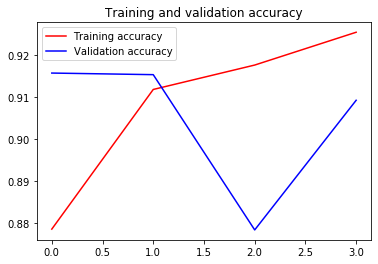

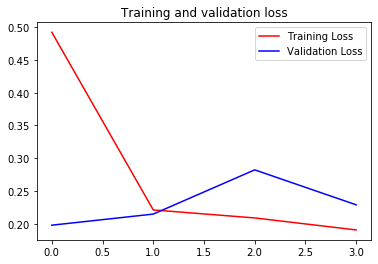

In [13]:
import matplotlib.pyplot as plt
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[[1.]]
this person smile


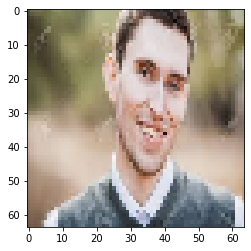

In [78]:
import numpy as np
from keras.preprocessing import image


img = image.load_img('E:\\assignments_DRkhaled\\smile_detection\\unseen_image.jpg', target_size=(64, 64))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = history2.model.predict(images, batch_size=10)

print(classes)
if (classes ==1):
      print('this person smile')
elif (classes ==0):
       print('this person is notsmile')

[[0.]]
this person is notsmile


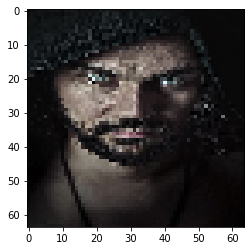

In [77]:
import numpy as np
from keras.preprocessing import image


img = image.load_img('E:\\assignments_DRkhaled\\smile_detection\\unseen_image2.jpg', target_size=(64, 64))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = history2.model.predict(images, batch_size=10)

print(classes)
if (classes ==1):
      print('this person smile')
elif (classes ==0):
       print('this person is notsmile')